<a href="https://colab.research.google.com/github/bahram3000/test_balancer_app/blob/main/polygon_pool_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -qqq web3

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 58.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 587.5/587.5 kB 29.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.5/102.5 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.4/51.4 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 340.3/340.3 kB 14.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 175.8/175.8 kB 11.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 75.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.4/48.4 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 58.3 MB/s eta 0:00:00


In [2]:
import numpy as np
import time
import requests, json
import math
import numpy as np
from my_func_pkg import exp_change,mean_exp
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

In [3]:
#v3_pool='0x553d3D295e0f695B9228246232eDF400ed3560B5'
GRAPH_API_KEY='0f011cf8766c88189291aa0b95792828'
ETH_SUBGRAPH_ID = "5zvR82QoaXYFyDEKLZ9t6v9adgnptxYpKpSbxtgVENFV"
POLYGON_SUBGRAPH_ID = "CwpebM66AH5uqS5sreKij8yEkkPcHvmyEs7EwFtdM5ND"

In [4]:
from web3 import Web3
from eth_abi import encode

w3 = Web3()

def get_pool_id(token0, token1, fee, tick_spacing, hook_address):
    # نرمال‌سازی آدرس‌ها
    token0 = Web3.to_checksum_address(token0)
    token1 = Web3.to_checksum_address(token1)
    hook_address = Web3.to_checksum_address(hook_address)

    encoded = encode(
        ['address', 'address', 'uint24', 'int24', 'address'],
        [token0, token1, fee, tick_spacing, hook_address]
    )

    pool_id = Web3.keccak(encoded).hex()
    return pool_id

In [5]:
def convert_fee_percentage_to_feetier(inp_fee_percentage):
  return int((inp_fee_percentage/100)*(10**6))

In [6]:
def calculate_tickspacing_by_feetier(inp_feetier):
  dct={10:1,500:10,3000:60,10000:200}
  return dct[inp_feetier]

In [48]:
token0 = "0x3c499c542cEF5E3811e1192ce70d8cC03d5c3359"   # آدرس واقعی بگذار
token1 = "0x553d3D295e0f695B9228246232eDF400ed3560B5"
fee_percentage=0.3
feetier=convert_fee_percentage_to_feetier(fee_percentage)        # مثلا 0.01% = 100
tick_spacing = calculate_tickspacing_by_feetier(feetier)  # بسته به کارمزد
hook = "0x0000000000000000000000000000000000000000"   # اگر بدون هوک باشد 0x0

v4_pool_id = get_pool_id(token0, token1, feetier, tick_spacing, hook)
print("PoolID:", v4_pool_id)

PoolID: d9826a1d95bd715232e7171cc9704f5940a5ef38d1b88d2687164baba1eb67df


In [49]:
v4_pool_id='0x'+v4_pool_id
v4_pool_id

'0xd9826a1d95bd715232e7171cc9704f5940a5ef38d1b88d2687164baba1eb67df'

In [42]:
url = f"https://gateway.thegraph.com/api/{GRAPH_API_KEY}/subgraphs/id/{POLYGON_SUBGRAPH_ID}"

In [41]:
# --- URL Subgraph ---
url = f"https://gateway.thegraph.com/api/{GRAPH_API_KEY}/subgraphs/id/{POLYGON_SUBGRAPH_ID}"

# --- کوئری کلی pool ---
query = """
{
  pool(id: "0xd9826a1d95bd715232e7171cc9704f5940a5ef38d1b88d2687164baba1eb67df") {
    id
    token0 {
      symbol
      decimals
    }
    token1 {
      symbol
      decimals
    }
    feeTier
    tick
    sqrtPrice
    liquidity
    sqrtPrice
    createdAtTimestamp
    feesUSD
    totalValueLockedUSD
    volumeUSD
    token0Price
    token1Price
  }
}"""

# --- درخواست و دریافت داده ---
response = requests.post(url, json={"query": query})
data = response.json()

# --- چاپ خروجی ---
print(json.dumps(data, indent=2))


{
  "data": {
    "pool": {
      "createdAtTimestamp": "1739972089",
      "feeTier": "3000",
      "feesUSD": "1285.195139061",
      "id": "0xd9826a1d95bd715232e7171cc9704f5940a5ef38d1b88d2687164baba1eb67df",
      "liquidity": "7604922088074677",
      "sqrtPrice": "1213797422380702827935479906509166",
      "tick": "192748",
      "token0": {
        "decimals": "6",
        "symbol": "USDC"
      },
      "token0Price": "4260.560588651009162155764783078038",
      "token1": {
        "decimals": "18",
        "symbol": "PAXG"
      },
      "token1Price": "0.0002347108975902682445812766737001822",
      "totalValueLockedUSD": "37533.02845437673151145718568822103",
      "volumeUSD": "428398.379687"
    }
  }
}


In [9]:
def calculate_price_from_sqrt_price(sqrt_price_raw: float, decimal_0: int, decimal_1: int) -> float:
    normalized_sqrt_price = sqrt_price_raw / (2 ** 96)
    raw_price_math = normalized_sqrt_price ** 2
    decimal_adjustment = decimal_0 - decimal_1
    final_price = raw_price_math * (10 ** decimal_adjustment)
    return final_price

In [10]:
def calculate_tick_by_price(price:float,decimal_0:int,decimal_1:int):
  t=(np.log(price)-np.log((10**(decimal_0-decimal_1))))/(np.log(1.0001))
  if t>0:
    return np.ceil(t)
  else:
    return np.floor(t)
  """if decimal_0>decimal_1:
    t=(np.log(price)-np.log((10**(decimal_0-decimal_1))))/(np.log(1.0001))
    if t>0:
      return np.ceil(t)
    else:
      return np.floor(t)
  else:
    t=(np.log(price)-np.log((10**(decimal_1-decimal_0))))/(np.log(1.0001))
    if t>0:
      return np.floor(t)
    else:
      return np.ceil(t)"""

In [11]:
def calculate_price_by_tick(tick:int,decimal_0:int,decimal_1:int):
  return (10**(decimal_0-decimal_1))*(1.0001**tick)
  '''if decimal_0>decimal_1:
    return (10**(decimal_0-decimal_1))*(1.0001**tick)
  else:
    return (10**(decimal_1-decimal_0))*(1.0001**tick)'''

In [12]:
def find_key(data, target_key):
    results = []
    if isinstance(data, dict):
        for key, value in data.items():
            if key == target_key:
                results.append(value)
            else:
                results.extend(find_key(value, target_key))
    elif isinstance(data, list):
        for item in data:
            results.extend(find_key(item, target_key))
    return results


In [13]:
def find_key_path(data, target_key):
    """
    جستجو در دیکشنری تو در تو برای یک کلید مشخص و برگرداندن
    مسیر root-to-leaf به صورت دیکشنری نگهدارنده ساختار.
    """
    if isinstance(data, dict):
        for key, value in data.items():
            if key == target_key:
                return {key: value}
            elif isinstance(value, (dict, list)):
                found = find_key_path(value, target_key)
                if found:
                    return {key: found}  # مسیر تا کلید هدف
    elif isinstance(data, list):
        for item in data:
            found = find_key_path(item, target_key)
            if found:
                return found
    return None


In [14]:
decimal0=float(find_key(data,'decimals')[0])
decimal1=float(find_key(data,'decimals')[1])
sqrtprice=float(find_key(data,'sqrtPrice')[0])

In [15]:
current_price=calculate_price_from_sqrt_price(sqrtprice,decimal0,decimal1)
1/current_price

4266.8940187502

In [16]:
current_tick=int(find_key(data,'tick')[0])

In [50]:
def pool_base_apr(inp_pool_id:str,inp_url:str):


  pool_idv = inp_pool_id.lower()

  queryv = f"""
  {{
    pool(id: "{pool_idv}") {{
      id
      createdAtTimestamp        # 1. زمان یونیکس ایجاد استخر (برای محاسبه عمر)
      tick                      # 2. تیک فعال فعلی (برای محاسبه ضریب تمرکز)
      feeTier                   # 3. نرخ کارمزد استخر (مثلاً 3000)
      feesUSD                   # 4. کارمزد کل انباشته تولید شده از ابتدا (صورت کسر APR)
      totalValueLockedUSD       # 5. کل نقدینگی قفل شده (TVL) به دلار (مخرج کسر APR)
      token0Price
      token1Price
      sqrtPrice
      token0 {{
        symbol                  # 6. نماد توکن 0 (PAXG)
        decimals                # 7. اعشار توکن 0 (برای تبدیل L به دلار)
      }}
      token1 {{
        symbol                  # 8. نماد توکن 1 (USDC)
        decimals                # 9. اعشار توکن 1 (برای تبدیل L به دلار)
      }}
    }}
  }}
  """

  rv = requests.post(url, json={"query": query})

  tvlv=float(find_key(rv.json(), "totalValueLockedUSD")[0])
  build_datev=float(find_key(rv.json(), "createdAtTimestamp")[0])
  all_fee_usdv=float(find_key(rv.json(), "feesUSD")[0])
  now_time=time.time()
  days=(int(now_time)-build_datev)/(24*60*60)
  return (((all_fee_usdv/days)/tvlv)+1)**365,((((all_fee_usdv/days)/tvlv))*365)+1

In [51]:
base_apr,apr=pool_base_apr(v4_pool_id,url)
print(base_apr,apr)

1.0451226311347233 1.0441368972679668


In [52]:
# نرخ پایه Uniswap (1.0001) به توان 0.5
Q_HALF = 1.0001 ** 0.5

def calculate_concentrated_apr_final(
    base_apr: float,
    current_tick: int,
    target_spacing: int,
    wide_ref_ticks: int = 500
) -> float:
    """
    محاسبه APR متمرکز نهایی با اعمال قدر مطلق بر ضریب تمرکز (Multiplier)
    برای جلوگیری از خطای ممیز شناور (Catastrophic Cancellation).
    """

    # --- 1. تعریف بازه تیک‌ها ---

    # بازه مرجع (500 تیک)
    ref_low_tick = current_tick - (wide_ref_ticks // 2)
    ref_high_tick = current_tick + (wide_ref_ticks // 2)

    # بازه هدف (Target Spacing)
    target_low_tick = current_tick
    target_high_tick = current_tick + target_spacing


    # --- 2. محاسبه Delta Sqrt Price برای بازه مرجع (Wide) ---

    # SqrtPrice = 1.0001 ** (tick / 2.0)
    sqrt_p_ref_high = 1.0001 ** (ref_high_tick / 2.0)
    sqrt_p_ref_low = 1.0001 ** (ref_low_tick / 2.0)

    # تفاضل (باید مثبت باشد، اما ممکن است به دلیل خطا منفی شود)
    delta_sqrt_price_wide = sqrt_p_ref_high - sqrt_p_ref_low


    # --- 3. محاسبه Delta Sqrt Price برای بازه هدف (Narrow) ---

    sqrt_p_target_high = 1.0001 ** (target_high_tick / 2.0)
    sqrt_p_target_low = 1.0001 ** (target_low_tick / 2.0)

    delta_sqrt_price_narrow = sqrt_p_target_high - sqrt_p_target_low


    # --- 4. محاسبه ضریب تمرکز ---
    if delta_sqrt_price_narrow == 0:
        return 0.0

    # اعمال قدر مطلق برای رفع خطای علامت منفی
    concentration_multiplier = abs(delta_sqrt_price_wide / delta_sqrt_price_narrow)

    # 5. محاسبه APR متمرکز نهایی
    apr_concentrated = base_apr * concentration_multiplier

    return apr_concentrated

In [53]:
def get_polygon_block_by_timestamp(api_key: str, target_timestamp: int) -> int:
    """
    دریافت شماره بلاک Polygon متناظر با timestamp مشخص از طریق Etherscan V2.
    """
    api_url = "https://api.etherscan.io/v2/api"
    target_timestamp = int(target_timestamp)

    params = {
        "chain": "polygon",
        "chainid": 137,
        "module": "block",
        "action": "getblocknobytime",
        "timestamp": target_timestamp,
        "closest": "before",
        "apikey": api_key
    }

    try:
        response = requests.get(api_url, params=params)
        response.raise_for_status()
        data = response.json()

        if response.status_code == 200:
            if len(data.get('result', '')) != 0:
                try:
                    return int(data['result'])
                except:
                    return data['result']
            else:
                return 0

    except requests.RequestException as e:
        print(f"❌ خطای ارتباطی: {e}")
        return 0

In [54]:
YOUR_ETHERSCAN_API_KEY = "N68HP1FGB4UQQFBHZQUJIM12HVYWJME96M"
timestamp_24h_ago = int(time.time()) - (24 * 60 * 60)
block_24h_ago = get_polygon_block_by_timestamp(YOUR_ETHERSCAN_API_KEY,timestamp_24h_ago)
if block_24h_ago > 0:
  print(f"\n✅ شماره بلاک 24 ساعت قبل: {block_24h_ago}")


✅ شماره بلاک 24 ساعت قبل: 79623258


In [57]:
def calculate_public_apr(inp_pool_address: str, inp_url: str, inp_block_time_ago: int,inp_days:int):

    inp_pool_address = inp_pool_address.lower()

    # --- GraphQL query: 24 hours ago ---
    historical_query = f"""
    {{
      pool(id: "{inp_pool_address}", block: {{ number: {inp_block_time_ago} }}) {{
        feesUSD
      }}
    }}
    """

    # --- GraphQL query: current ---
    current_query = f"""
    {{
      pool(id: "{inp_pool_address}") {{
        feesUSD
        totalValueLockedUSD
      }}
    }}
    """

    # --- Request current data ---
    rjs_current = requests.post(inp_url, json={"query": current_query}).json()
    now_tvl_usd = float(find_key(rjs_current, "totalValueLockedUSD")[0])
    fee_usd_now = float(find_key(rjs_current, "feesUSD")[0])

    # --- Request historical data ---
    rjs_past = requests.post(inp_url, json={"query": historical_query}).json()
    fee_usd_time_ago = float(find_key(rjs_past, "feesUSD")[0])
    past_tvl_usd=float(find_key(rjs_current, "totalValueLockedUSD")[0])

    # --- APR Calculation ---
    daily_return = ((fee_usd_now - fee_usd_time_ago)/inp_days) / ((now_tvl_usd+past_tvl_usd)/2)
    apr = daily_return * 365

    return apr


In [58]:
calculate_public_apr(v4_pool_id,url,block_24h_ago,1)

0.24432924017328123

In [59]:
(time.time()-float(find_key(data,'createdAtTimestamp')[0]))/(24*60*60)

283.1702418939107

In [60]:
timestamp_282d_ago = int(time.time()) - (282 * 60 * 60)

In [61]:
block_282d_ago=get_polygon_block_by_timestamp(YOUR_ETHERSCAN_API_KEY,timestamp_282d_ago)

In [62]:
calculate_public_apr(v4_pool_id,url,block_282d_ago,282)

0.008282529651300734

In [63]:
tick_spacing

60

In [64]:
len_range=1.0001**tick_spacing

In [95]:
gold_df=yf.download(tickers='GC=F', period='max', interval='1d')

/tmp/ipython-input-581710961.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  gold_df=yf.download(tickers='GC=F', period='max', interval='1d')
[*********************100%***********************]  1 of 1 completed


In [96]:
closes=gold_df.loc[:,'Close'].values[:,0]

In [97]:
ret=exp_change(closes)

In [98]:
eavg=mean_exp(ret)
var=np.var(ret)
print(eavg,var)

1.0004318671709378 0.00011997460281691998


In [102]:
breakeven_day=np.log(len_range)/np.log(eavg+var)
breakeven_day

np.float64(10.875137758239498)

In [100]:
(1-len_range)/(1-(eavg+var))

np.float64(10.904818292159153)

In [69]:
apr_focus1=1+calculate_concentrated_apr_final(0.14,current_tick,60,wide_ref_ticks=1200)
apr_focus1

3.79622165705725

In [70]:
apr_focus2=1+calculate_concentrated_apr_final(0.24432924017328123,current_tick,60,wide_ref_ticks=1200)
apr_focus2

5.8799908058919375

In [72]:
dpr1=apr_focus1**(1/365)
dpr1

1.0036614986705716

In [73]:
dpr2=apr_focus2**(1/365)
dpr2

1.0048653735644066

In [74]:
(1-dpr1)/(1-eavg)

8.572276640069562

In [75]:
(1-dpr2)/(1-eavg)

11.39078063487692

In [76]:
def init_calculate_Liquid_amounts(lower,upper,capital):
  init_price=(lower+upper)/2
  s=np.sqrt(init_price)
  su=np.sqrt(upper)
  sl=np.sqrt(lower)
  amount_0=(capital/2)/init_price
  amount_1=capital/2
  l_0=amount_0*s*su/(su-s)
  l_1=amount_1/(s-sl)
  l=min(l_0,l_1)
  return l,amount_0,amount_1

In [77]:
def calculate_new_amounts(current_price,lower,upper,capital):
  l=init_calculate_Liquid_amounts(lower,upper,capital)[0]
  s=np.sqrt(current_price)
  su=np.sqrt(upper)
  sl=np.sqrt(lower)
  amount_0=l*((1/s)-(1/su))
  amount_1=l*(s-sl)
  return amount_0,amount_1

In [78]:
lower=4196.4137
upper=4221.6666
capital=100

In [79]:
init_calculate_Liquid_amounts(lower,upper,capital)

(np.float64(513.4334984694378), 0.011879192931908715, 50.0)

In [82]:
calculate_new_amounts(4202,lower,upper,capital)

(np.float64(0.01847048111880672), np.float64(22.1306846342116))

In [103]:
x_p2=np.array([lower*(eavg**i) for i in range(int(breakeven_day))])
deposit2=[]
hold=[]
all1=[]
all2=[]
j=0
for i in x_p2:
  cna=calculate_new_amounts(i,lower,upper,capital)
  deposit2.append(cna[0]*i+cna[1])
  hold.append(((capital/2)+(i/((lower+upper)/2))*(capital/2)))
  all1.append((deposit2[j]+(deposit2[j]*j*(dpr1-1))))
  all2.append((deposit2[j]+(deposit2[j]*j*(dpr2-1))))
  j+=1

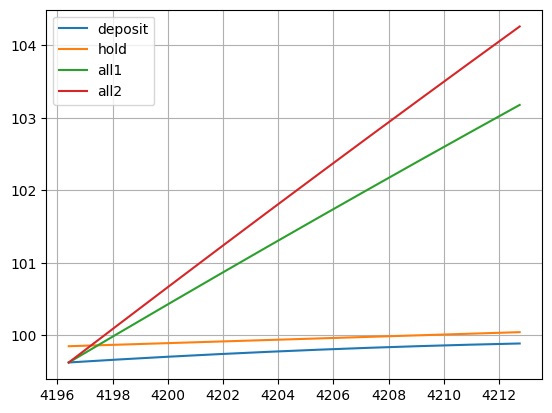

In [104]:
plt.plot(x_p2,deposit2)
plt.plot(x_p2,hold)
plt.plot(x_p2,all1)
plt.plot(x_p2,all2)
plt.legend(['deposit','hold','all1','all2'])
plt.grid()
plt.show()

In [88]:
import random

In [112]:
num_of_random_test=1000
all_depo = np.zeros(10, dtype=np.float64)
all_hold = np.zeros(10, dtype=np.float64)
all_lp1 = np.zeros(10, dtype=np.float64)
all_lp2 = np.zeros(10, dtype=np.float64)
for m in range(num_of_random_test):
  x_test=[random.uniform(lower,upper) for i in range(int(breakeven_day))]
  dep=[]
  hld=[]
  lp1=[]
  lp2=[]
  k=0
  for i in x_test:
    cna=calculate_new_amounts(i,lower,upper,capital)
    dep.append(cna[0]*i+cna[1])
    hld.append(((capital/2)+(i/((lower+upper)/2))*(capital/2)))
    lp1.append((dep[k]+(dep[k]*k*(dpr1-1))))
    lp2.append((dep[k]+(dep[k]*k*(dpr2-1))))
    k+=1
  all_depo+=np.array(dep)
  all_hold+=np.array(hld)
  all_lp1+=np.array(lp1)
  all_lp2+=np.array(lp2)


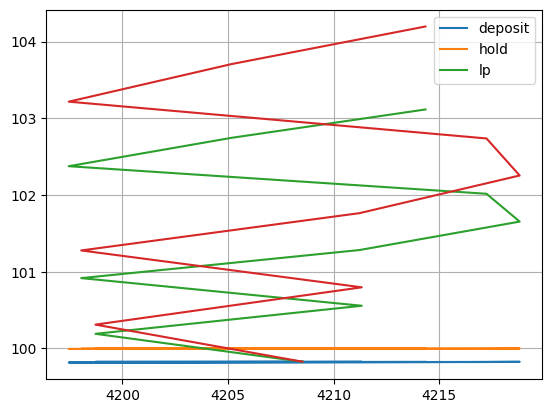

In [113]:
plt.plot(x_test,all_depo/num_of_random_test)
plt.plot(x_test,all_hold/num_of_random_test)
plt.plot(x_test,all_lp1/num_of_random_test)
plt.plot(x_test,all_lp2/num_of_random_test)
plt.legend(['deposit','hold','lp'])
plt.grid()
plt.show()

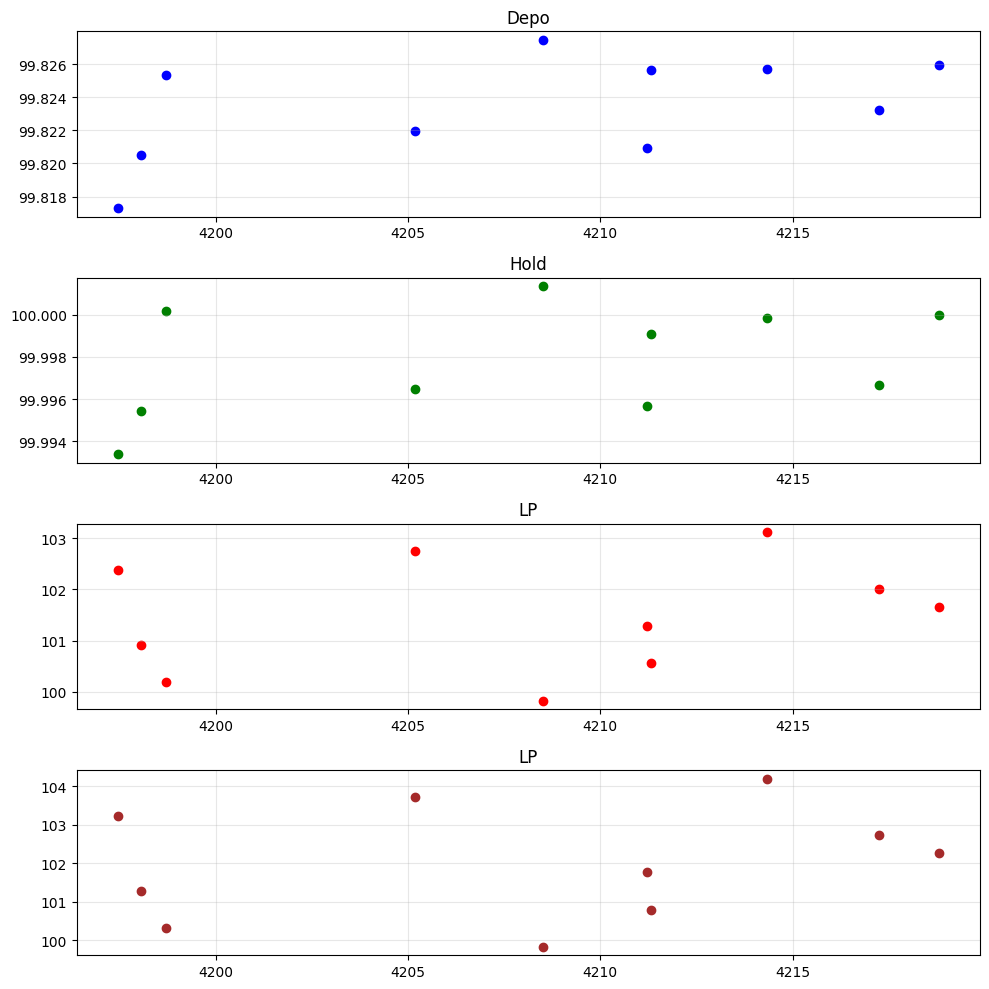

In [114]:
import matplotlib.pyplot as plt

# میانگین‌گیری
avg_depo = all_depo / num_of_random_test
avg_hold = all_hold / num_of_random_test
avg_lp1   = all_lp1   / num_of_random_test
avg_lp2   = all_lp2/num_of_random_test

plt.figure(figsize=(10, 10))

# نمودار اول: Depo
plt.subplot(4, 1, 1)
#plt.plot(x_test, avg_depo, 'b-', linewidth=2)
plt.scatter(x_test, avg_depo, c='blue', marker='o')
plt.title('Depo')
plt.grid(True, alpha=0.3)
plt.gca().get_yaxis().get_major_formatter().set_useOffset(False)  # ✅ رفع خطا

# نمودار دوم: Hold
plt.subplot(4, 1, 2)
#plt.plot(x_test, avg_hold, 'g-', linewidth=2)
plt.scatter(x_test, avg_hold, c='green', marker='o')
plt.title('Hold')
plt.grid(True, alpha=0.3)
plt.gca().get_yaxis().get_major_formatter().set_useOffset(False)  # ✅ رفع خطا

# نمودار سوم: LP
plt.subplot(4, 1, 3)
#plt.plot(x_test, avg_lp, 'r-', linewidth=2)
plt.scatter(x_test, avg_lp1, c='red', marker='o')
plt.title('LP')
plt.grid(True, alpha=0.3)
plt.gca().get_yaxis().get_major_formatter().set_useOffset(False)  # ✅ رفع خطا

plt.subplot(4, 1, 4)
plt.scatter(x_test, avg_lp2, c='brown', marker='o')
plt.title('LP')
plt.grid(True, alpha=0.3)
plt.gca().get_yaxis().get_major_formatter().set_useOffset(False)

# فاصله مناسب بین subplotها
plt.tight_layout()
plt.show()